# What Neighborhood Is Best to Walk Your Fish?

### By Team Garlic (Haiden Hunter, Andrew Noonan, and Jeffery He)

![alt text](https://i.pinimg.com/736x/41/88/1c/41881cdd0b6c1c5eb9ee45b3e7395c0b.jpg)

## Introduction

What is the weirdest activity you can imagine? I hope that walking your pet fish was your first thought, because it was ours. Now lets take that silly idea and make it comically practical. You would need a place to walk your fish. At first, we thought of public rivers, ponds, and lakes. However, when talking about the neighborhoods around Pittsburgh the rivers dominate the waterways. And what if a much bigger fish is lurking in that murky water waiting to eat your beloved pet? Instead, we turned to public pools. Assuming your fish is supernatural and can survive in chlorine dense waters, but that is a given. Now you do not want someone to mistake your pet fish for one that is meant to be cooked right? So we also analyzed local fish fry locations in order to avoid thoes areas. And to top everything off, you and your fish deserve the highest air quality. So we also made sure that the local air quality was up to standard. But in the end its all about your fish's happiness. So we will combine all these metrics into a *Fish Enjoyment Score* to ultimately conclude the best neighborhood to walk your fish.

## The Metrics

The *Fish Enjoyment Score* is the ultimate fish walkability metric created by analyzing

1. The number of fish fries.
2. The number of public pools.
3. The air quality of the area.

To reach our conclusing we analyzed the following data sets:

1. [Pittsburgh Fish Fry Locations](https://data.wprdc.org/dataset/pittsburgh-fish-fry-map)

    This dataset contains lists of local fish fry locations of the last 5 years.
    
2. [Public Pool Inspections](https://data.wprdc.org/dataset/allegheny-county-public-swimming-pool-hot-tub-and-spa-inspections)

    This dataset contains the data collected by pool inspectors around the Pittsburgh areas.
    
3. [Air Quality](https://data.wprdc.org/dataset/allegheny-county-air-quality)

    This dataset contains ratings of the local air quality.
    
4. [Reference List of Pittsburgh Neighborhoods](https://data.wprdc.org/dataset/neighborhoods2/resource/668d7238-cfd2-492e-b397-51a6e74182ff)

    This dataset contains a list of all Pittsburgh neighborhoods.




## Metric #1: Avoid Fish Fries at All Cost

##### Haiden Hunter

We begin by importing all of our data and merging it into one file.

In [1]:
import pandas as pd
import fpsnippets

fishFryData2023 = pd.read_csv("https://data.wprdc.org/datastore/dump/511a29f6-3217-4f61-a9ba-b3b5b35ab5fb")
fishFryData2022 = pd.read_csv("https://data.wprdc.org/dataset/682daad1-6d3a-45d3-8710-6c961146e19b/resource/f4d7e81a-ac39-4f84-a249-c68524e8258a/download/2022_pittsburgh_fish_fry_locations.csv")
fishFryData2021 = pd.read_csv("https://data.wprdc.org/dataset/682daad1-6d3a-45d3-8710-6c961146e19b/resource/dfa58a5b-d221-411f-bd7e-32837ff99993/download/2021_pittsburgh_fish_fry_locations.csv")
fishFryData2020 = pd.read_csv("https://data.wprdc.org/dataset/682daad1-6d3a-45d3-8710-6c961146e19b/resource/d802d628-bd44-47cc-bbc9-c691f9026ca1/download/2020_pittsburgh_fish_fry_locations.csv")
fishFryData2019 = pd.read_csv("https://data.wprdc.org/dataset/682daad1-6d3a-45d3-8710-6c961146e19b/resource/5b58c467-8e6a-4abc-9dd5-a39881770b3c/download/2019_pittsburgh_fish_fry_locations.csv")
fishFryData = pd.concat([fishFryData2023, fishFryData2022, fishFryData2021, fishFryData2020, fishFryData2019]).reset_index()

fishFryData.head(3)

,index,_id,validated,venue_name,venue_type,venue_address,website,events,etc,menu_url,...,email,homemade_pierogies,take_out,alcohol,lunch,handicap,publish,id,latitude,longitude
0,0,8680.0,t,"St. Peter Church, St. Faustina Parish",Church,"670 South Main Street, Slippery Rock, Pennsylv...",https://stfaustinaparish.org/,"Friday Feb 24 from 4:00 PM to 7:00 PM, Friday ...",NaN,https://stfaustinaparish.org/,...,NaN,NaN,t,NaN,f,NaN,t,NaN,41.056430,-80.050690
1,1,8681.0,f,Hartford Heights Volunteer Fire Department,Fire Department,"14335 U.S. 30, Irwin, PA 15642",https://www.facebook.com/Hartford-Heights-VFD-...,"Friday Feb 24 from 4:00 PM to 8:00 PM, Friday ...",NaN,NaN,...,NaN,f,t,NaN,f,NaN,f,NaN,40.352969,-79.767295
2,2,8682.0,t,"Our Lady of Joy Church, Holy Family Parish",Church,"2000 O'Block Road Holiday Park, PA",https://holyfamilypgh.org/,"Wednesday Feb 22 from 4:00 PM to 7:00 PM, Frid...",NaN,chrome-extension://efaidnbmnnnibpcajpcglclefin...,...,NaN,NaN,t,NaN,f,NaN,t,NaN,40.480007,-79.719563


Now this data contains a lot of unnecessary information. Lets remove unneeded columns.

In [2]:
fishFryData = fishFryData[['validated', 'venue_name', 'latitude', 'longitude']]
fishFryData.head(3)

,validated,venue_name,latitude,longitude
0,t,"St. Peter Church, St. Faustina Parish",41.056430,-80.050690
1,f,Hartford Heights Volunteer Fire Department,40.352969,-79.767295
2,t,"Our Lady of Joy Church, Holy Family Parish",40.480007,-79.719563


This is progess but we will need to spend some time getting the data into a state that is best
suited to analysis it by location. I began this process by converting all of raw data into a list
of neighborhoods using the `fpsnippets.geo_to_neighborhood` function.

In [3]:
finalFishFryData = pd.DataFrame()

for x, row in fishFryData.iterrows():
    neighborhood = fpsnippets.geo_to_neighborhood(row['latitude'], row['longitude'])
    if neighborhood != None:
        if ((row["validated"]) == "t") or ((row["validated"]) == True):
            finalFishFryData = pd.concat([finalFishFryData, pd.DataFrame([{'Neighborhood':neighborhood}])])

finalFishFryData = finalFishFryData.reset_index(drop=True)

finalFishFryData.head(3)

,Neighborhood
0,Central Lawrenceville
1,Windgap
2,Point Breeze North


Much better! All that is left is to turn it into a comprehensive list to analyze. To do this I used a reference list of all the neighborhoods in Pittsburgh, then looped through our list of fish fry neighborhoods and kept a tally. What we get will be a compleated list of the number of fish frys in each neighborhood.

In [4]:
listOfHoods = pd.read_csv("https://data.wprdc.org/datastore/dump/668d7238-cfd2-492e-b397-51a6e74182ff")
listOfHoods = listOfHoods[['hood']]
neighborhoodFishFrys = pd.DataFrame(columns=["Neighborhood", "Number of Fish Fries"])

for index, row in listOfHoods.iterrows():
    hood = row["hood"]
    count = 0
    for index2, row2 in finalFishFryData.iterrows():
        if hood == row2["Neighborhood"]:
            count = count + 1
    neighborhoodFishFrys = pd.concat([neighborhoodFishFrys, pd.DataFrame([{'Neighborhood':hood, 'Number of Fish Fries':count}])])

neighborhoodFishFrys = neighborhoodFishFrys.sort_values(by=['Number of Fish Fries'], ascending=False).reset_index(drop=True)

# Adjusting pandas display settings.
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

topFishData = neighborhoodFishFrys.head(5)
neighborhoodFishFrys.head(5)

,Neighborhood,Number of Fish Fries
0,South Side Flats,22
1,Central Business District,15
2,Elliott,9
3,Strip District,8
4,East Allegheny,8


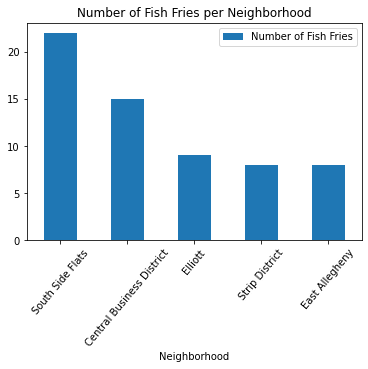

In [5]:
topFishData.plot.bar(x="Neighborhood", y="Number of Fish Fries", title="Number of Fish Fries per Neighborhood", rot="50")

## Metric #2: Public Pool Search

##### Jeffery He

To begin, lets import the data.

In [6]:
import pandas as pd

poolData = pd.read_csv("DATAFILES/AquaticInspections.csv")

poolData.head(3)

,_id,Inspection ID,Facility ID,Facility Name,Facility Address,Facility Address 2,Facility Municipality Name,Facility City,Facility County,Facility State,Facility Postal Code,Facility Latitude,Facility Longitude,Venue Type,Inspection Date,Inspection End,Inspection Purpose,Inspection Passed,Inspection Number,Inspector Name,"Free Chlorine, Shallow","Free Chlorine, Deep","Combined Chlorine, Shallow","Combined Chlorine, Deep","Free Bromine, Shallow","Free Bromine, Deep","pH Value, Shallow","pH Value, Deep",Cyanuric Acid,Turnover,Enclosure,Main Drain Visible,Safety Equipment,Disinfectant Level,pH Balance,No Imminent Health Hazards,Abated Date
0,59290,195942,9097,COMFORT INN & SUITES NORTH SHORE - POOL,820 E OHIO STREET,NaN,Pittsburgh,Pittsburgh,Allegheny County,PA,15212.0,40.454503,-79.996269,POOLS (INDOOR),2021-10-15T09:10:00,2021-10-15T09:20:00,FOLLOW UP INSPECTION,t,4,NOBBS SCOTT,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,t,t,t,t,t,t,2021-10-18
1,59291,195998,1201,MOON HIGH SCHOOL POOL,8353 UNIVERSITY BOULEVARD,NaN,Moon Township,MOON TOWNSHIP,Allegheny County,PA,15108.0,40.510321,-80.220011,POOLS (SCHOOLS),2021-10-18T13:50:00,2021-10-19T14:45:00,INITIAL INSPECTION,t,1,MANOWN MARYANN,4.5,4.0,0.0,0.0,NaN,NaN,7.4,7.4,NaN,725.0,t,t,t,t,t,t,2021-10-25
2,59292,196048,1491,HOMEWOOD SUITES - POOL,2000 GSK DRIVE,NaN,Moon Township,CORAOPOLIS,Allegheny County,PA,15108.0,40.458873,-80.176376,POOLS (INDOOR),2021-10-18T15:10:00,2021-10-21T15:50:00,INITIAL INSPECTION,t,1,MANOWN MARYANN,2.5,NaN,0.0,NaN,NaN,NaN,7.4,NaN,NaN,45.0,t,t,t,t,t,t,2022-10-24


Remove unwanted columns.

In [7]:
poolData = poolData[['Facility Latitude', 'Facility Longitude', 'Venue Type', 'Inspection Passed']]
poolData.head(3)

,Facility Latitude,Facility Longitude,Venue Type,Inspection Passed
0,40.454503,-79.996269,POOLS (INDOOR),t
1,40.510321,-80.220011,POOLS (SCHOOLS),t
2,40.458873,-80.176376,POOLS (INDOOR),t


Now lets sort the data based on neighborhood using `fpsnippets`.

In [8]:
poolDataHood = pd.DataFrame()

for x, row in poolData.iterrows():
    hood = fpsnippets.geo_to_neighborhood(row['Facility Latitude'], row['Facility Longitude'])
    if hood != None:
        poolDataHood = pd.concat([poolDataHood, pd.DataFrame([{'Hood':hood, 'Venue Type':row['Venue Type'], 'Inspection Passed':row['Inspection Passed']}])])
        
poolDataHood = poolDataHood.reset_index(drop=True)
poolDataHood.head(3)

,Hood,Venue Type,Inspection Passed
0,East Allegheny,POOLS (INDOOR),t
1,Banksville,POOLS (INDOOR),t
2,Beechview,POOLS (INDOOR),f


Now we can remove all data rows that do *NOT* pass inspection. We would not want your fish swimming in bad water!

In [9]:
poolDataHoodMask = poolDataHood[poolDataHood['Inspection Passed'].str.contains('t')]
poolDataHoodMask = poolDataHoodMask.reset_index(drop=True)
poolDataHoodMask.head(3)

,Hood,Venue Type,Inspection Passed
0,East Allegheny,POOLS (INDOOR),t
1,Banksville,POOLS (INDOOR),t
2,Squirrel Hill North,POOLS (INDOOR),t


Now lets make sure that its only pools we are dealing with.

In [10]:
poolDataHoodMask = poolDataHood[poolDataHood['Venue Type'].str.contains('POOLS')]
poolDataHoodMask = poolDataHoodMask.reset_index(drop=True)
poolDataHoodMask.head(10)

,Hood,Venue Type,Inspection Passed
0,East Allegheny,POOLS (INDOOR),t
1,Banksville,POOLS (INDOOR),t
2,Beechview,POOLS (INDOOR),f
3,Squirrel Hill South,POOLS (INDOOR),f
4,Squirrel Hill North,POOLS (INDOOR),t
5,Central Business District,POOLS (INDOOR),t
6,Central Business District,POOLS (INDOOR),f
7,Allegheny Center,POOLS (SCHOOLS),t
8,North Shore,POOLS (INDOOR),t
9,Central Northside,POOLS (INDOOR),t


Now we have a list of Pittsburgh pools that have passed inspection. This data can be used when computing the best fish friendly neighborhood.

## Metric #3: Air Quality Verification

##### Andrew Noonan

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
airQuality = pd.read_csv("https://data.wprdc.org/datastore/dump/4ab1e23f-3262-4bd3-adbf-f72f0119108b")
airQuality.head(3)

,_id,date,site,parameter,index_value,description,health_advisory,health_effects
0,1,2016-01-01,Lawrenceville,PM25B,25,Good,NaN,NaN
1,2,2016-01-01,Flag Plaza,CO,0,Good,NaN,NaN
2,3,2016-01-01,Harrison Township,OZONE,31,Good,NaN,NaN


I visualized the dataset to get an initial picture of where neighborhoods stand.

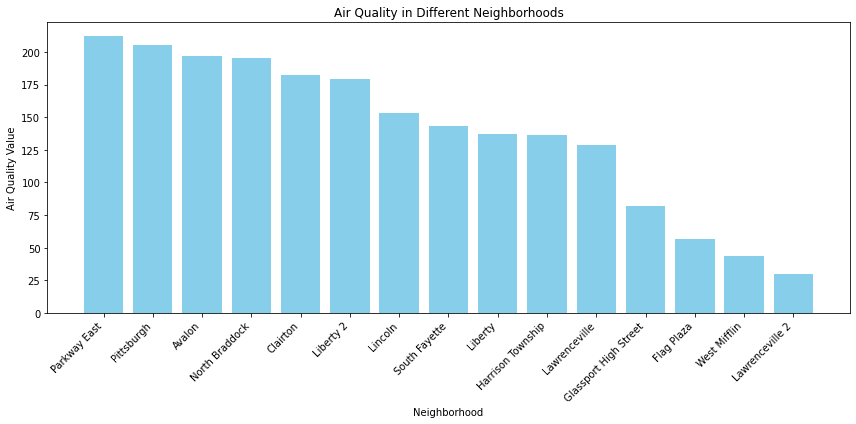

In [11]:
airQuality = airQuality.sort_values(by=['index_value'], ascending=False)
plt.figure(figsize=(12, 6))
plt.bar(airQuality['site'], airQuality['index_value'], color='skyblue')
plt.xlabel('Neighborhood')
plt.ylabel('Air Quality Value')
plt.title('Air Quality in Different Neighborhoods')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
# Show the plot
plt.show()

I created a query mask to eliminate any neighborhoods that had moderate or bad air quality and printed the dataset.

In [7]:
air_query_mask = airQuality['description'].str.contains("Good")
good_air = airQuality[air_query_mask]
good_air.head(3)

,_id,date,site,parameter,index_value,description,health_advisory,health_effects
0,1,2016-01-01,Lawrenceville,PM25B,25,Good,NaN,NaN
1,2,2016-01-01,Flag Plaza,CO,0,Good,NaN,NaN
2,3,2016-01-01,Harrison Township,OZONE,31,Good,NaN,NaN


I visualized the dataset of neighborhoods with good air.

In [ ]:
good_air = good_air.sort_values(by=['index_value'], ascending=False)
plt.figure(figsize=(12, 6))
plt.bar(good_air['site'], good_air['index_value'], color='skyblue')
plt.xlabel('Neighborhood')
plt.ylabel('Air Quality Value')
plt.title('Air Quality in Different Neighborhoods')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
# Show the plot
plt.show()

As we can see the suburbs of Pittsburgh, especially Lawrenceville and West Mifflin, score highly. However, the dataset reported some inconsistencies with how Lawrenceville 2 records air quality in comparison to the rest of the sites. So if we were judging purely on air quality, West Mifflin would win. Yet, the rest of out data is comprised of neighborhoods within Pittsburgh. And as the graph shows, Pittsburgh is not terribly far behind. So the air quality can be considered high enough in any Pittsburgh neighborhood to walk your fish.

## Fish Enjoyment Score Calculator

##### Haiden Hunter

We can now combine all of our data into one final score to determine the best neighborhood to walk your fish.

#### Calculating Score:
Fish Fry = -3 Point

Pool = +1 Point

In [46]:
listOfHoods = pd.read_csv("https://data.wprdc.org/datastore/dump/668d7238-cfd2-492e-b397-51a6e74182ff")
listOfHoods = listOfHoods[['hood']]
fishEnjoymentScore = pd.DataFrame(columns=["Neighborhood", "Score"])
fishEnjoymentScoreUpdated = pd.DataFrame(columns=["Neighborhood", "Score"])

# Adding fish fries to score.
for index, row in listOfHoods.iterrows():
    hood = row["hood"]
    score = 0
    for index2, row2 in neighborhoodFishFrys.iterrows():
        if hood == row2["Neighborhood"]:
            score = row2["Number of Fish Fries"] * -3
    fishEnjoymentScore = pd.concat([fishEnjoymentScore, pd.DataFrame([{'Neighborhood':hood, 'Score':score}])])
fishEnjoymentScore = fishEnjoymentScore.reset_index(drop=True)

# Adding pools to score.
for index, row in fishEnjoymentScore.iterrows():
    hood = row["Neighborhood"]
    score = row["Score"]
    for index2, row2 in poolDataHoodMask.iterrows():
        if hood == row2["Hood"]:
            score = score + 1
    fishEnjoymentScoreUpdated = pd.concat([fishEnjoymentScoreUpdated, pd.DataFrame([{'Neighborhood':hood, 'Score':score}])])
fishEnjoymentScoreUpdated = fishEnjoymentScoreUpdated.sort_values(by=['Score'], ascending=False).reset_index(drop=True)

topFESData = fishEnjoymentScoreUpdated.head(5)

Our fish enjoyment score calculator is now compleate. All that is left to do is check the results!

In [62]:
topFESData = fishEnjoymentScoreUpdated.head(5)
fishEnjoymentScoreUpdated.head(5)

,Neighborhood,Score
0,North Shore,24
1,North Oakland,13
2,Squirrel Hill South,13
3,Banksville,12
4,Terrace Village,7


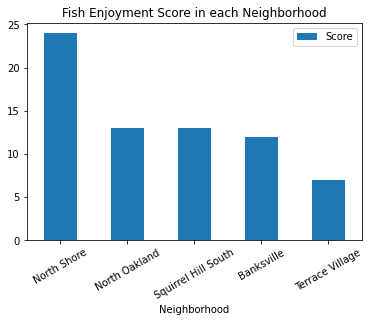

In [66]:
topFESData.plot.bar(x="Neighborhood", y="Score", title="Fish Enjoyment Score in each Neighborhood", rot="30")

### The *North Shore* is the best neighborhood to walk your fish!

#### Conclusions:

**Haiden:** I was definitely surprised by the sheer number of pools in the North Shore. And due to its lack of fish fries these pools allow it to pull ahead of the other neighborhoods, making it the clear winner. In terms of my personal favorite neighborhood in Pittsburgh, I would say North Oakland. I know that is a generic answer considering where Pitt is loacated, but it is true. I am a local to the Pittsburgh area, so I have been around, and the raw density of cool stuff in North Oakland is unbeatable. The museums, restaurants, and vibrant nature of the neighborhood really seals the deal for me. And if there is something downtown you want to do, it is a 5 minute car ride. Meaning you get all the benefits of downtown without any of the hastle. And as a bonus, it is the second best neighborhood to walk your fish. :)

**Andrew** I was surprised by how many neighborhoods in pittsburgh had good air quality, especially because most of the reports I have heard on the news would say that Pittsburgh has some of the worst air quality outside of California. Additionally, while the North Shore was the best neighborhood to walk your fish, personal experience would tell me you *Definitely* don't want to live there.

![alt text](https://media.giphy.com/media/LnnvGmYxaHiMlMKfuh/giphy.gif)

## Questions?

### Thank you.